# **Data Export**

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

%load_ext autoreload
%autoreload 2

attendance = pd.read_csv('/content/attendance_without_covid.csv')
weather = pd.read_csv('/content/weather_cleaned.csv')
parade = pd.read_csv('/content/parade_cleaned.csv')
schedule = pd.read_csv('/content/schedule_cleaned.csv')
waiting = pd.read_csv('/content/waiting_cleaned.csv')
link_attraction = pd.read_csv('/content/attraction.csv')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
attendance_df = attendance
entity_df = schedule
link_attraction_park_df = link_attraction
parades_df = parade
waiting_time_df = waiting
weather_df = weather

#**Merging the tables**

**Waiting time data preparation and merge with weather**

In [9]:
# Converting to date format
# waiting_time_df['FIN_TIME'] = waiting_time_df['FIN_TIME'].str.slice(0,16) # This line is causing the error
waiting_time_df['FIN_TIME'] = pd.to_datetime(waiting_time_df['FIN_TIME'], errors='coerce') # Use errors='coerce' to handle potential errors during conversion
waiting_time_df['FIN_TIME'] = waiting_time_df['FIN_TIME'].dt.strftime('%Y-%m-%d %H:%M') # Format to the desired string format
waiting_time_df['FIN_TIME'] = pd.to_datetime(waiting_time_df['FIN_TIME'], format='%Y-%m-%d %H:%M') # Convert back to datetime with the correct format

waiting_time_df['DEB_TIME'] = pd.to_datetime(waiting_time_df['DEB_TIME'], errors='coerce')
waiting_time_df['DEB_TIME'] = waiting_time_df['DEB_TIME'].dt.strftime('%Y-%m-%d %H:%M')
waiting_time_df['DEB_TIME'] = pd.to_datetime(waiting_time_df['DEB_TIME'], format='%Y-%m-%d %H:%M')
weather_df['date'] = pd.to_datetime(weather_df['date'])
# Merging waiting time and weather data
merge_1 = waiting_time_df.merge(weather_df, left_on='FIN_TIME', right_on='date' , how='left')
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,39.0,802.0,Clouds,scattered clouds,03n,2018-01-01 21:15:00
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,NaN,NaN,NaN,NaN,23.0,801.0,Clouds,few clouds,02n,2018-01-01 19:45:00
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,51.0,803.0,Clouds,broken clouds,04n,2018-01-01 22:45:00
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,0.92,NaN,NaN,NaN,99.0,500.0,Rain,light rain,10d,2018-01-01 13:00:00
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,0.24,NaN,NaN,NaN,67.0,500.0,Rain,light rain,10n,2018-01-01 18:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


**Merging the Dataframe with the Attractions**

In [10]:
merge_1 = merge_1.merge(link_attraction_park_df, left_on='ENTITY_DESCRIPTION_SHORT', right_on='ATTRACTION', how='left')
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date,ATTRACTION,PARK_y
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,NaN,NaN,39.0,802.0,Clouds,scattered clouds,03n,2018-01-01 21:15:00,Roller Coaster,PortAventura World
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,NaN,NaN,23.0,801.0,Clouds,few clouds,02n,2018-01-01 19:45:00,Bumper Cars,PortAventura World
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,NaN,NaN,51.0,803.0,Clouds,broken clouds,04n,2018-01-01 22:45:00,Rapids Ride,PortAventura World
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,NaN,NaN,99.0,500.0,Rain,light rain,10d,2018-01-01 13:00:00,Crazy Dance,PortAventura World
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,NaN,NaN,67.0,500.0,Rain,light rain,10n,2018-01-01 18:30:00,Free Fall,PortAventura World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Himalaya Ride,PortAventura World
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Crazy Dance,PortAventura World
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Crazy Dance,PortAventura World
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Giga Coaster,PortAventura World


**Merging Dataframe with attendance data**

In [11]:
# Merge merge_1 and attendance data
merge_1 = merge_1.merge(attendance_df, left_on=['PARK_y','WORK_DATE'] , right_on=['FACILITY_NAME', 'USAGE_DATE'], how='left')
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,weather_icon,date,ATTRACTION,PARK_y,USAGE_DATE,FACILITY_NAME,attendance,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,03n,2018-01-01 21:15:00,Roller Coaster,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,02n,2018-01-01 19:45:00,Bumper Cars,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,04n,2018-01-01 22:45:00,Rapids Ride,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,10d,2018-01-01 13:00:00,Crazy Dance,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,10n,2018-01-01 18:30:00,Free Fall,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Himalaya Ride,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Crazy Dance,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Crazy Dance,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Giga Coaster,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN


**Final Merged Dataset**

In [21]:
merge_1

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,weather_icon,date,ATTRACTION,PARK_y,USAGE_DATE,FACILITY_NAME,attendance,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,03n,2018-01-01 21:15:00,Roller Coaster,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,02n,2018-01-01 19:45:00,Bumper Cars,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,04n,2018-01-01 22:45:00,Rapids Ride,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,10d,2018-01-01 13:00:00,Crazy Dance,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,10n,2018-01-01 18:30:00,Free Fall,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Himalaya Ride,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Crazy Dance,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Crazy Dance,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Giga Coaster,PortAventura World,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
colonne_nulle = merge_1.isnull().mean() * 100
colonne_nulle[colonne_nulle > 0]
merge_1 = merge_1.drop(columns=colonne_nulle[colonne_nulle > 80].index)

In [23]:
# Inputation par 0 pour les valeurs manquantes pour attendance
merge_1['attendance'].fillna(0, inplace=True)

#Imputation de la moyenne pour les valeurs manquantes pour les autres colonnes
merge_1['temp'].fillna(merge_1['temp'].mean(), inplace=True)
merge_1['feels_like'].fillna(merge_1['feels_like'].mean(), inplace=True)
merge_1['temp_min'].fillna(merge_1['temp_min'].mean(), inplace=True)
merge_1['temp_max'].fillna(merge_1['temp_max'].mean(), inplace=True)
merge_1['pressure'].fillna(merge_1['pressure'].mean(), inplace=True)
merge_1['humidity'].fillna(merge_1['humidity'].mean(), inplace=True)
merge_1['wind_speed'].fillna(merge_1['wind_speed'].mean(), inplace=True)
merge_1['wind_deg'].fillna(merge_1['wind_deg'].mean(), inplace=True)
merge_1['clouds_all'].fillna(merge_1['clouds_all'].mean(), inplace=True)
merge_1['weather_main'].fillna(merge_1['clouds_all'].mean(), inplace=True)
merge_1 = merge_1.drop(columns=['dew_point', 'weather_description'])
merge_1

<ipython-input-23-0a424d1cede9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge_1['attendance'].fillna(0, inplace=True)
<ipython-input-23-0a424d1cede9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

,WORK_DATE,DEB_TIME,DEB_TIME_HOUR,FIN_TIME,ENTITY_DESCRIPTION_SHORT,WAIT_TIME_MAX,NB_UNITS,GUEST_CARRIED,CAPACITY,ADJUST_CAPACITY,...,weather_icon,date,ATTRACTION,PARK_y,USAGE_DATE,FACILITY_NAME,attendance,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
0,2018-01-01,2018-01-01 21:00:00,21,2018-01-01 21:15:00,Roller Coaster,0,2.0,0.0,0.000,0.00,...,03n,2018-01-01 21:15:00,Roller Coaster,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
1,2018-01-01,2018-01-01 19:30:00,19,2018-01-01 19:45:00,Bumper Cars,5,18.0,148.0,254.749,254.75,...,02n,2018-01-01 19:45:00,Bumper Cars,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
2,2018-01-01,2018-01-01 22:30:00,22,2018-01-01 22:45:00,Rapids Ride,0,1.0,0.0,0.000,0.00,...,04n,2018-01-01 22:45:00,Rapids Ride,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
3,2018-01-01,2018-01-01 12:45:00,12,2018-01-01 13:00:00,Crazy Dance,5,1.0,46.0,250.001,250.00,...,10d,2018-01-01 13:00:00,Crazy Dance,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
4,2018-01-01,2018-01-01 18:15:00,18,2018-01-01 18:30:00,Free Fall,50,3.0,0.0,0.000,0.00,...,10n,2018-01-01 18:30:00,Free Fall,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369816,2022-08-18,2022-08-18 18:45:00,18,2022-08-18 19:00:00,Himalaya Ride,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Himalaya Ride,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
2369817,2022-08-18,2022-08-18 10:15:00,10,2022-08-18 10:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Crazy Dance,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
2369818,2022-08-18,2022-08-18 09:15:00,9,2022-08-18 09:30:00,Crazy Dance,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Crazy Dance,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
2369819,2022-08-18,2022-08-18 20:30:00,20,2022-08-18 20:45:00,Giga Coaster,0,0.0,0.0,0.000,0.00,...,NaN,NaT,Giga Coaster,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN


In [28]:
merge_1.rename(columns={'WORK_DATE': 'DATE',
                        'DEB_TIME': 'START OF 1 RIDE FOR ATTRACTION',
                        'FIN_TIME': 'END OF 1 RIDE FOR ATTRACTION',
                        'DEB_TIME_HOUR': 'HOUR START OF 1 RIDE',
                        'ENTITY_DESCRIPTION_SHORT': 'ATTRACTION NAME',
                        'WAIT_TIME_MAX': 'WAIT TIME',
                        'NB_UNITS': 'NB UNITS',
                        'GUEST_CARRIED': 'GUEST CARRIED',
                        'OPEN TIME': 'ATTRACTION TIME OPEN FOR 15MIN',
                        'UP_TIME': 'REAL TIME ATTRACTION OPEN FOR 15MIN',
                        'DOWNTIME': 'REAL TIME ATTRACTION CLOSES FOR 15MIN',
                        'NB_MAX_UNIT': 'NB MAX UNITS',
                        'temp': 'TEMPERATURE',
                        'feels_like': 'TEMPERATURE FELT',
                        'temp_min': 'TEMPERATURE MINIMUM',
                        'temp_max': 'TEMPERATURE MAXIMUM',
                        'pressure': 'PRESSURE',
                        'humidity': 'HUMIDITY',
                        'wind_speed': 'WIND SPEED',
                        'wind_deg': 'WIND DEG',
                        'clouds_all': 'CLOUD PERCENTAGE',
                        'weather_main': 'WEATHER MAIN',
                        'attendance': 'ATTENDANCE',
                        'ADJUST_CAPACITY': 'ADJUST CAPACITY'
                    }, inplace=True)
merge_1 = merge_1.sort_values(by='START OF 1 RIDE FOR ATTRACTION')
merge_1

,DATE,START OF 1 RIDE FOR ATTRACTION,HOUR START OF 1 RIDE,END OF 1 RIDE FOR ATTRACTION,ATTRACTION NAME,WAIT TIME,NB UNITS,GUEST CARRIED,CAPACITY,ADJUST CAPACITY,...,weather_icon,date,ATTRACTION,PARK_y,USAGE_DATE,FACILITY_NAME,ATTENDANCE,TIME CLOSED,min_DEB_TIME,max_FIN_TIME
325,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,Rapids Ride,0,2.0,0.0,0.0000,0.0,...,04d,2018-01-01 09:15:00,Rapids Ride,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
1055,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,Circus Train,0,1.0,0.0,0.0000,0.0,...,04d,2018-01-01 09:15:00,Circus Train,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
1339,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,Giga Coaster,0,12.0,154.0,705.7500,353.0,...,04d,2018-01-01 09:15:00,Giga Coaster,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
1277,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,Crazy Dance,0,1.0,0.0,50.0001,50.0,...,04d,2018-01-01 09:15:00,Crazy Dance,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
1357,2018-01-01,2018-01-01 09:00:00,9,2018-01-01 09:15:00,Inverted Coaster,0,1.0,0.0,0.0000,0.0,...,04d,2018-01-01 09:15:00,Inverted Coaster,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369454,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,Circus Train,0,1.0,0.0,0.0000,0.0,...,NaN,NaT,Circus Train,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
2368999,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,Roller Coaster,0,1.0,0.0,0.0000,0.0,...,NaN,NaT,Roller Coaster,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
2369271,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,Haunted House,0,9.0,0.0,0.0000,0.0,...,NaN,NaT,Haunted House,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN
2369405,2022-08-18,2022-08-18 22:45:00,22,2022-08-18 23:00:00,Dizzy Dropper,0,88.0,0.0,0.0000,0.0,...,NaN,NaT,Dizzy Dropper,PortAventura World,NaN,NaN,0.0,NaN,NaN,NaN


In [29]:
# Save the final dataframe
merge_1.to_csv('final_data_15min.csv', index=False)

KeyboardInterrupt: 

**Extracting non-covid periods**

In [30]:
#after
df_15=merge_1
df_15['DATE'] = pd.to_datetime(df_15['DATE'])
df_15_bis = df_15[(df_15['DATE'] > pd.Timestamp('2021-07-01')) & (df_15['DATE'] < pd.Timestamp('2022-07-01'))]
df_15_bis = df_15_bis[df_15_bis['GUEST CARRIED'] != 0]
df_15_bis = df_15_bis[df_15_bis['ATTENDANCE'] != 0]

df_15_bis = df_15_bis[df_15_bis['ADJUST CAPACITY'] != 0]
df_15_bis['Ratio People/Capacity'] =df_15_bis['GUEST CARRIED']/df_15_bis['ADJUST CAPACITY']
df_15_bis = df_15_bis[df_15_bis['Ratio People/Capacity'] <= 1]

In [31]:
#before
df_15=merge_1
df_15['DATE'] = pd.to_datetime(df_15['DATE'])
df_15_avt = df_15[(df_15['DATE'] < pd.Timestamp('2019-07-01')) & (df_15['DATE'] > pd.Timestamp('2018-07-01'))]
df_15_avt = df_15_avt[df_15_avt['GUEST CARRIED'] != 0]
df_15_avt = df_15_avt[df_15_avt['ATTENDANCE'] != 0]

df_15_avt = df_15_avt[df_15_avt['ADJUST CAPACITY'] != 0]
df_15_avt['Ratio People/Capacity'] =df_15_avt['GUEST CARRIED']/df_15_avt['ADJUST CAPACITY']
df_15_avt = df_15_avt[df_15_avt['Ratio People/Capacity'] <= 1]

**Plotting the average waiting time by attractions**

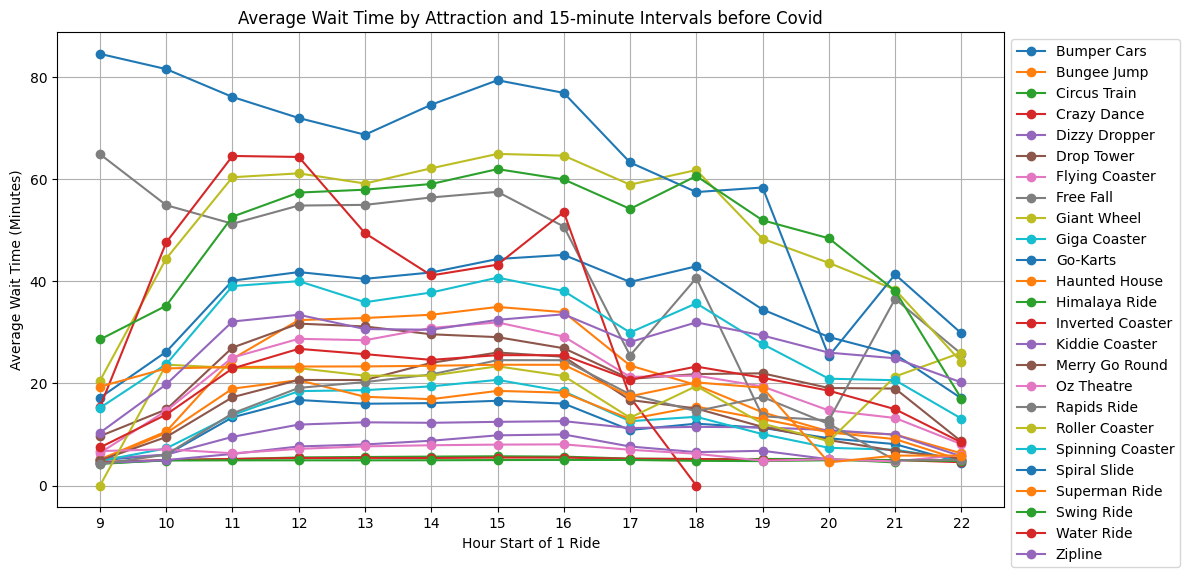

In [32]:
average_wait_time_by_attraction_and_time = df_15_avt.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()
selected_attractions = df_15_avt['ATTRACTION']
average_wait_time_by_attraction_and_time = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
average_wait_time_by_attraction_and_time.sort_values(['ATTRACTION', 'HOUR START OF 1 RIDE'], inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for attraction in average_wait_time_by_attraction_and_time['ATTRACTION'].unique():
    data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'] == attraction]
    plt.plot(data['HOUR START OF 1 RIDE'], data['WAIT TIME'], marker='o', linestyle='-', label=attraction)

plt.title('Average Wait Time by Attraction and 15-minute Intervals before Covid')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(average_wait_time_by_attraction_and_time['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

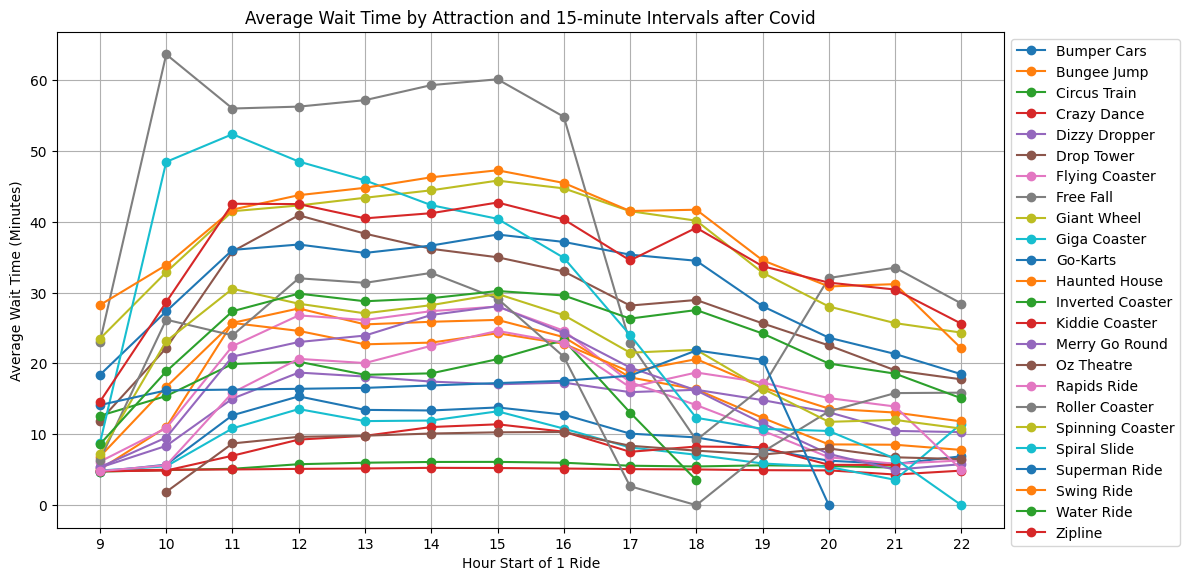

In [33]:
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()
selected_attractions = df_15_bis['ATTRACTION'].unique()[:40].tolist()
average_wait_time_by_attraction_and_time = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
average_wait_time_by_attraction_and_time.sort_values(['ATTRACTION', 'HOUR START OF 1 RIDE'], inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

for attraction in average_wait_time_by_attraction_and_time['ATTRACTION'].unique():
    data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'] == attraction]
    plt.plot(data['HOUR START OF 1 RIDE'], data['WAIT TIME'], marker='o', linestyle='-', label=attraction)

plt.title('Average Wait Time by Attraction and 15-minute Intervals after Covid')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(average_wait_time_by_attraction_and_time['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

**Plotting the average time over day and year**

Daily data

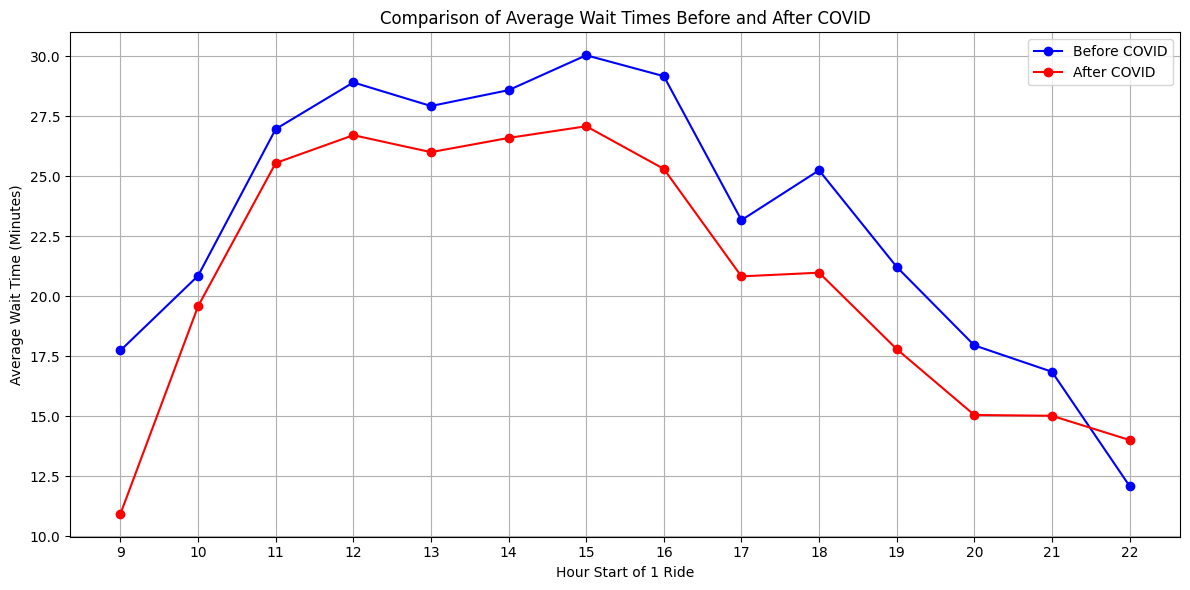

In [46]:
import matplotlib.pyplot as plt

# Compute the average wait time for each hour before and after COVID
average_wait_time_before = df_15_avt.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
average_wait_time_after = df_15_bis.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
#average_wait_time_all = df_15_all.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))

plt.plot(average_wait_time_before['HOUR START OF 1 RIDE'],
         average_wait_time_before['WAIT TIME'],
         marker='o', linestyle='-', color='blue', label='Before COVID')

plt.plot(average_wait_time_after['HOUR START OF 1 RIDE'],
         average_wait_time_after['WAIT TIME'],
         marker='o', linestyle='-', color='red', label='After COVID')

# Labels and title
plt.title('Comparison of Average Wait Times Before and After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')

plt.legend()
plt.grid(True)
plt.xticks(average_wait_time_before['HOUR START OF 1 RIDE'].unique())  # Use the X-axis from before COVID
plt.tight_layout()
plt.show()


Monthly data

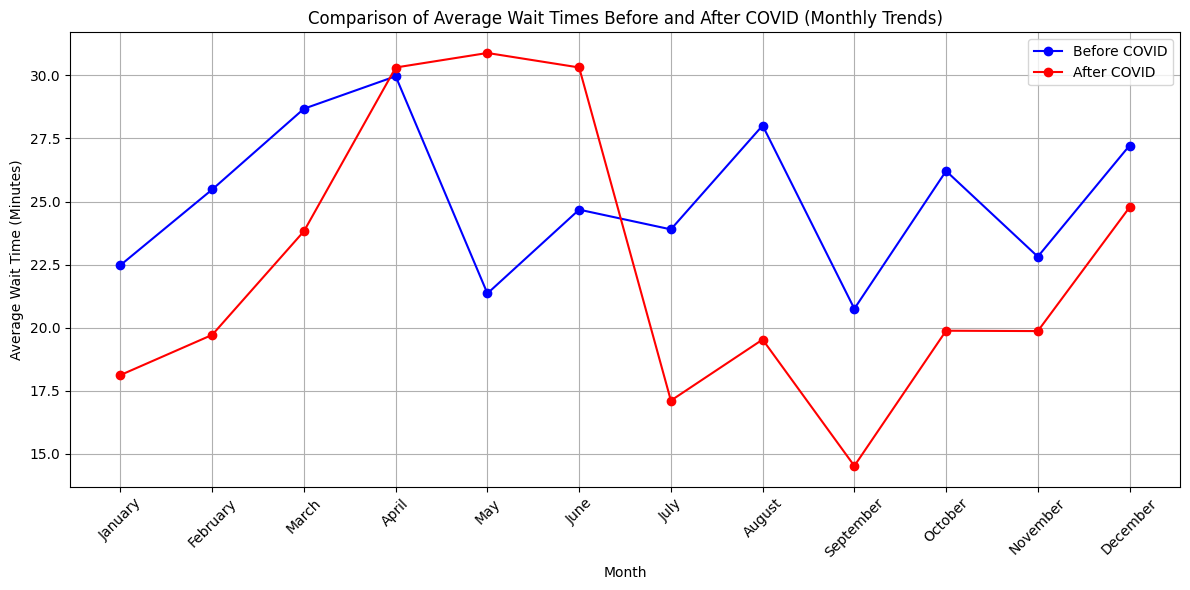

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'DATE' to datetime format if not already
df_15_avt['DATE'] = pd.to_datetime(df_15_avt['DATE'])
df_15_bis['DATE'] = pd.to_datetime(df_15_bis['DATE'])

# Extract month name
df_15_avt['Month'] = df_15_avt['DATE'].dt.strftime('%B')  # Full month name
df_15_bis['Month'] = df_15_bis['DATE'].dt.strftime('%B')

# Ensure months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Compute the average wait time per month (ignoring year)
average_wait_time_before = df_15_avt.groupby('Month')['WAIT TIME'].mean().reindex(month_order).reset_index()
average_wait_time_after = df_15_bis.groupby('Month')['WAIT TIME'].mean().reindex(month_order).reset_index()

# Plot
plt.figure(figsize=(12, 6))

plt.plot(average_wait_time_before['Month'],
         average_wait_time_before['WAIT TIME'],
         marker='o', linestyle='-', color='blue', label='Before COVID')

plt.plot(average_wait_time_after['Month'],
         average_wait_time_after['WAIT TIME'],
         marker='o', linestyle='-', color='red', label='After COVID')

# Labels and title
plt.title('Comparison of Average Wait Times Before and After COVID (Monthly Trends)')
plt.xlabel('Month')
plt.ylabel('Average Wait Time (Minutes)')

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate for better readability
plt.tight_layout()
plt.show()


Monthly through the years

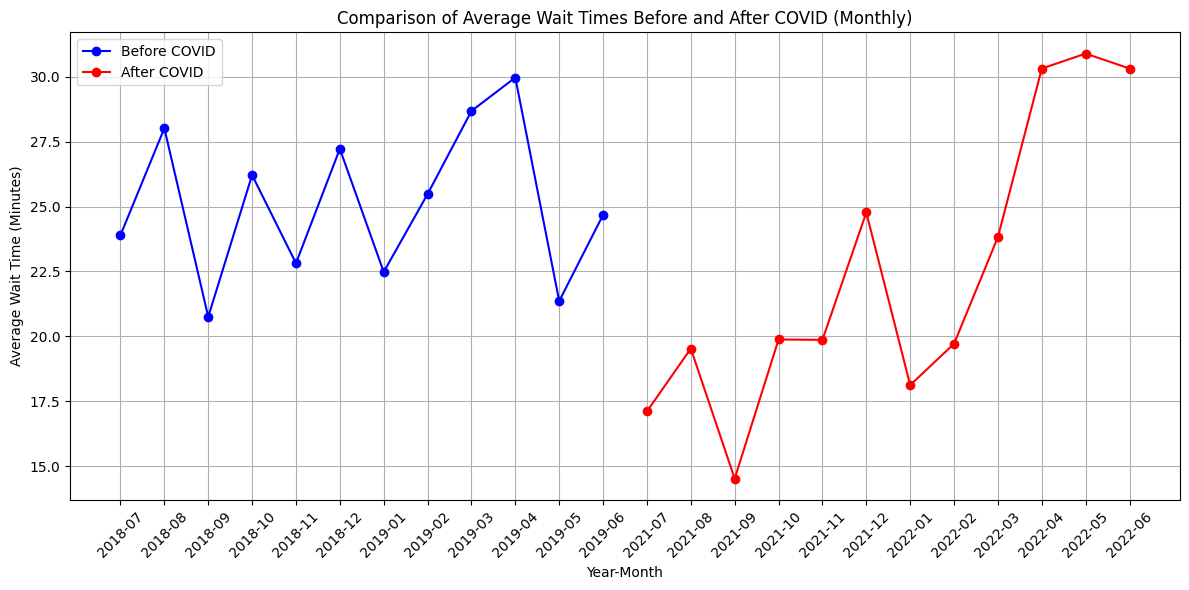

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'DATE' to datetime format if not already
df_15_avt['DATE'] = pd.to_datetime(df_15_avt['DATE'])
df_15_bis['DATE'] = pd.to_datetime(df_15_bis['DATE'])

# Extract year and month
df_15_avt['YearMonth'] = df_15_avt['DATE'].dt.to_period('M')
df_15_bis['YearMonth'] = df_15_bis['DATE'].dt.to_period('M')

# Compute the average wait time per month
average_wait_time_before = df_15_avt.groupby('YearMonth')['WAIT TIME'].mean().reset_index()
average_wait_time_after = df_15_bis.groupby('YearMonth')['WAIT TIME'].mean().reset_index()

# Convert 'YearMonth' back to string for plotting
average_wait_time_before['YearMonth'] = average_wait_time_before['YearMonth'].astype(str)
average_wait_time_after['YearMonth'] = average_wait_time_after['YearMonth'].astype(str)

# Plot
plt.figure(figsize=(12, 6))

plt.plot(average_wait_time_before['YearMonth'],
         average_wait_time_before['WAIT TIME'],
         marker='o', linestyle='-', color='blue', label='Before COVID')

plt.plot(average_wait_time_after['YearMonth'],
         average_wait_time_after['WAIT TIME'],
         marker='o', linestyle='-', color='red', label='After COVID')

# Labels and title
plt.title('Comparison of Average Wait Times Before and After COVID (Monthly)')
plt.xlabel('Year-Month')
plt.ylabel('Average Wait Time (Minutes)')

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate for better readability
plt.tight_layout()
plt.show()


Top performer attractions aggregated

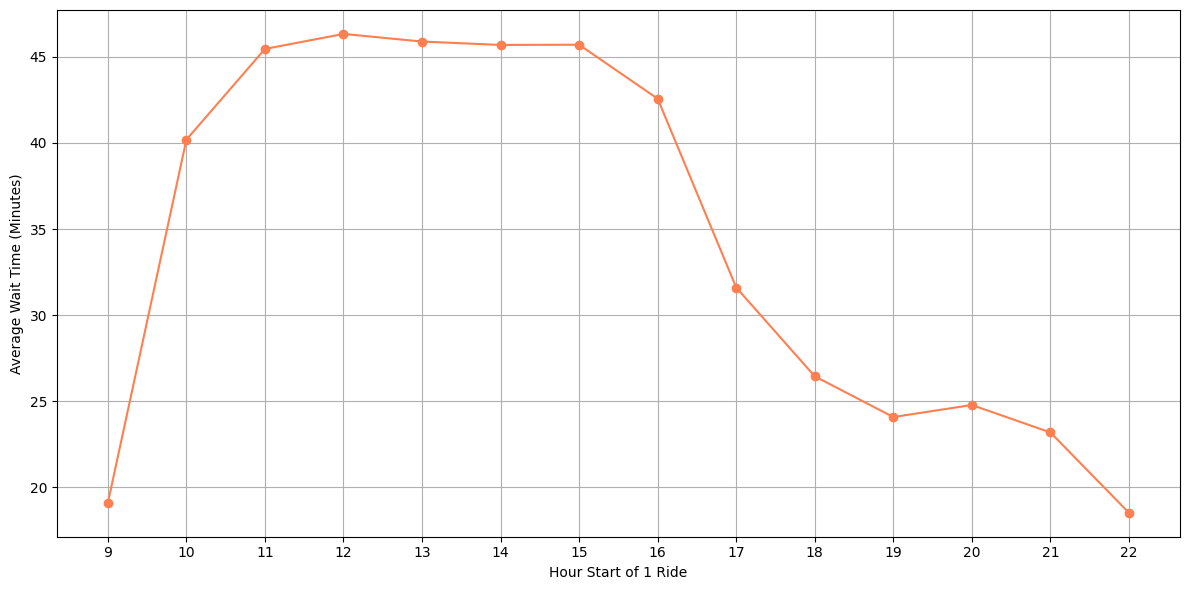

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by attraction and hour, then compute the mean wait time
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()

# Select the first 40 unique attractions
selected_attractions = ['Spiral Slide','Free Fall','Swing Ride','Giant Wheel','Drop Tower','Go Karts']

# Filter data for selected attractions
filtered_data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]

# Compute the overall mean wait time across all selected attractions for each time interval
average_wait_time_overall = filtered_data.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_wait_time_overall['HOUR START OF 1 RIDE'],
         average_wait_time_overall['WAIT TIME'],
         marker='o', linestyle='-', color='coral', label='Average Wait Time')

# Labels and title
#plt.title('Overall Average Wait Time of Most waited Attractions After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
plt.grid(True)
plt.xticks(average_wait_time_overall['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()


Top and worst performer attractions aggregated

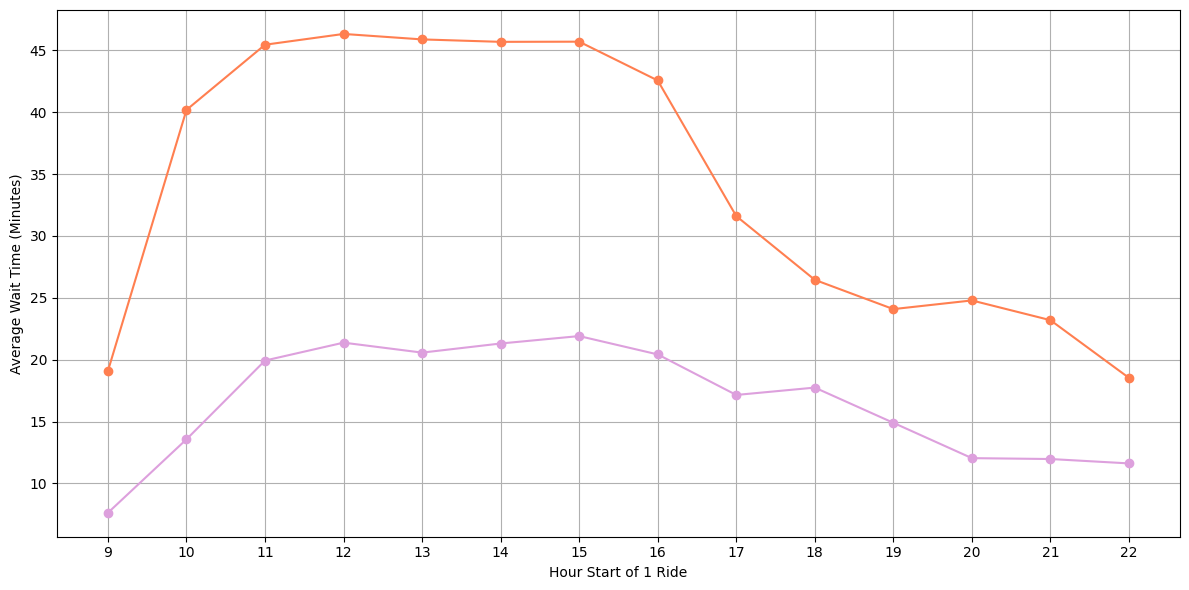

In [49]:

# Group by attraction and hour, then compute the mean wait time
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()

# Select the first 40 unique attractions
selected_attractions = ['Spiral Slide','Free Fall','Swing Ride','Giant Wheel','Drop Tower','Go Karts']

# Filter data for selected attractions
filtered_data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
filtered_data_no = df_15_bis[~df_15_bis['ATTRACTION'].isin(selected_attractions)]
# Compute the overall mean wait time across all selected attractions for each time interval
average_wait_time_overall = filtered_data.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
average_wait_time_remaining = filtered_data_no.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_wait_time_overall['HOUR START OF 1 RIDE'],
         average_wait_time_overall['WAIT TIME'],
         marker='o', linestyle='-', color='coral', label='Average Wait Time')


plt.plot(average_wait_time_remaining['HOUR START OF 1 RIDE'],
         average_wait_time_remaining['WAIT TIME'],
         marker='o', linestyle='-', color='plum', label='Average Wait Time (Other Attractions)')

# Labels and title
#plt.title('Overall Average Wait Time (Excluding Selected Attractions) After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.xticks(average_wait_time_remaining['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

Heatmap of the capacity to waiting time correlation

In [41]:
from functools import reduce
rush_hour_df = df_15_bis[(df_15_bis['HOUR START OF 1 RIDE'] > 9) & (df_15_bis['HOUR START OF 1 RIDE'] < 17)]
capacity_analysis = rush_hour_df.groupby('ATTRACTION')['CAPACITY'].mean().reset_index()
capacity_analysis.sort_values(by = 'CAPACITY', inplace = True)

ratio_analysis = rush_hour_df.groupby('ATTRACTION')['Ratio People/Capacity'].mean().reset_index()
ratio_analysis.sort_values(by = 'Ratio People/Capacity', inplace = True)

average_wait_time_by_attraction = rush_hour_df.groupby('ATTRACTION')['WAIT TIME'].mean().reset_index()
average_wait_time_by_attraction.sort_values(by = 'WAIT TIME', inplace = True)

data_frames = [ratio_analysis, capacity_analysis, average_wait_time_by_attraction]
combined_analysis = reduce(lambda left, right: pd.merge(left, right, on='ATTRACTION'), data_frames)

combined_analysis.sort_values('WAIT TIME', ascending= False)

,ATTRACTION,Ratio People/Capacity,CAPACITY,WAIT TIME
11,Free Fall,0.569166,134.749000,58.145713
13,Spiral Slide,0.593083,75.000000,44.642058
8,Swing Ride,0.513617,242.250000,43.295946
21,Giant Wheel,0.664208,503.750000,42.108020
18,Zipline,0.615661,101.250000,39.778517
22,Go-Karts,0.680559,450.479410,35.422761
19,Drop Tower,0.631533,140.250000,34.473841
1,Roller Coaster,0.367986,74.994519,28.048331
9,Water Ride,0.515242,244.240782,27.818017
10,Spinning Coaster,0.547461,526.250000,27.715530


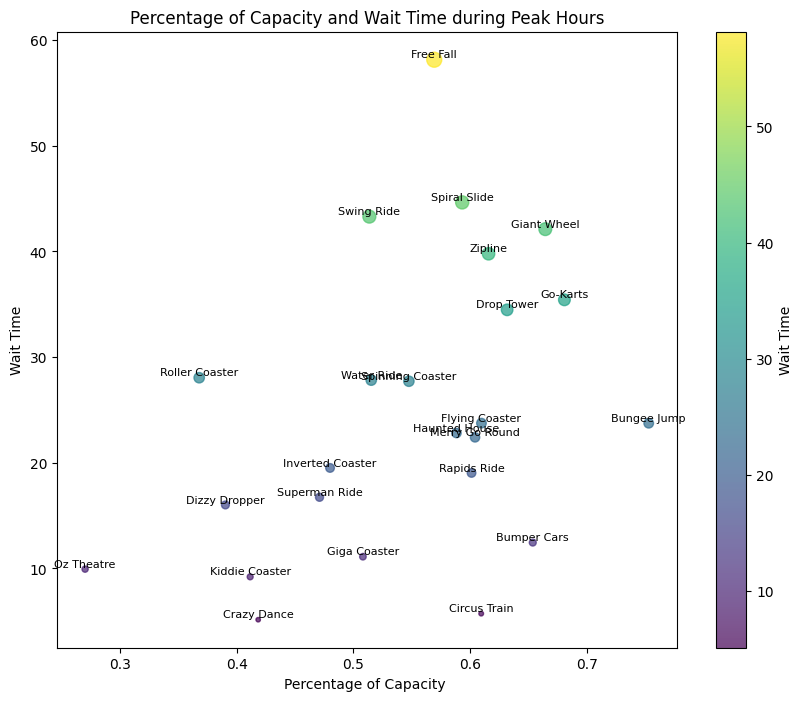

In [42]:
from sklearn.linear_model import LinearRegression

attraction_names = combined_analysis['ATTRACTION']
ratio_people_capacity = combined_analysis['Ratio People/Capacity']
wait_time = combined_analysis['WAIT TIME']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(ratio_people_capacity, wait_time, c=wait_time, cmap='viridis', s=wait_time*2, alpha=0.7)


plt.title('Percentage of Capacity and Wait Time during Peak Hours')
plt.xlabel('Percentage of Capacity ')
plt.ylabel('Wait Time')

cbar = plt.colorbar(scatter)
cbar.set_label('Wait Time')

texts = [plt.text(ratio_people_capacity[i], wait_time[i], txt, fontsize=8, ha='center', va='bottom') for i, txt in enumerate(attraction_names)]

plt.show()

**Particular examples of the attractions before and after covid**

Free fall

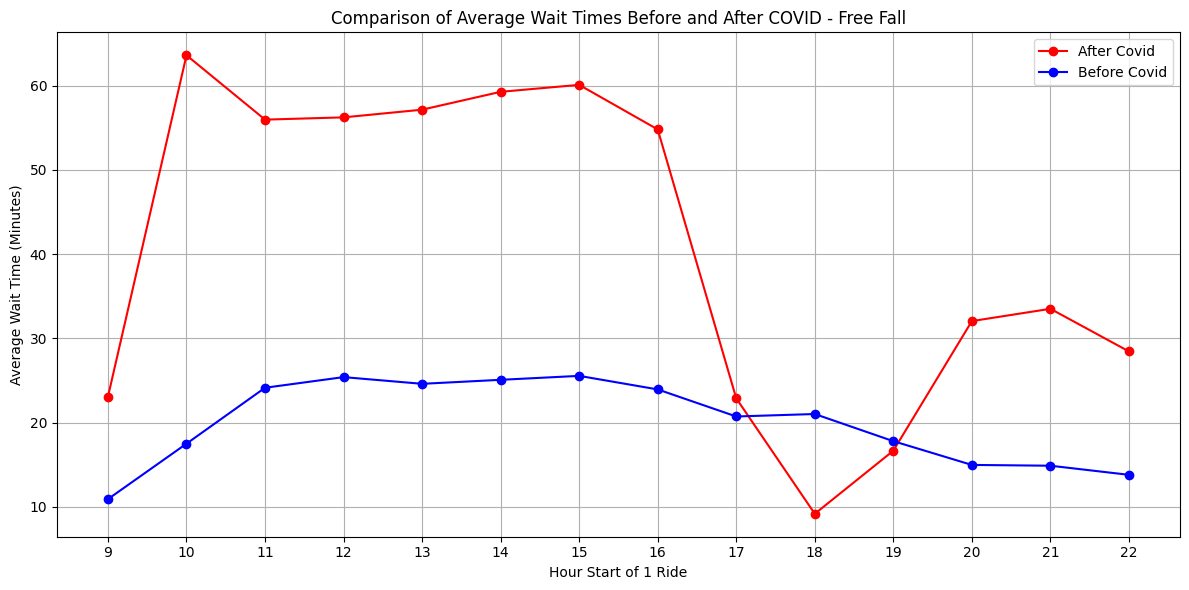

In [43]:

# Group by attraction and hour, then compute the mean wait time
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()

# Select the first 40 unique attractions
selected_attractions = ['Free Fall']

# Filter data for selected attractions
filtered_data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
filtered_data_no = df_15_bis[~df_15_bis['ATTRACTION'].isin(selected_attractions)]
# Compute the overall mean wait time across all selected attractions for each time interval
average_wait_time_overall = filtered_data.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
average_wait_time_remaining = filtered_data_no.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_wait_time_overall['HOUR START OF 1 RIDE'],
         average_wait_time_overall['WAIT TIME'],
         marker='o', linestyle='-', color='red', label='After Covid')


plt.plot(average_wait_time_remaining['HOUR START OF 1 RIDE'],
         average_wait_time_remaining['WAIT TIME'],
         marker='o', linestyle='-', color='blue', label='Before Covid')

# Labels and title
#plt.title('Overall Average Wait Time (Excluding Selected Attractions) After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title('Comparison of Average Wait Times Before and After COVID - Free Fall')
plt.legend()
plt.xticks(average_wait_time_remaining['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

Spiral Slide

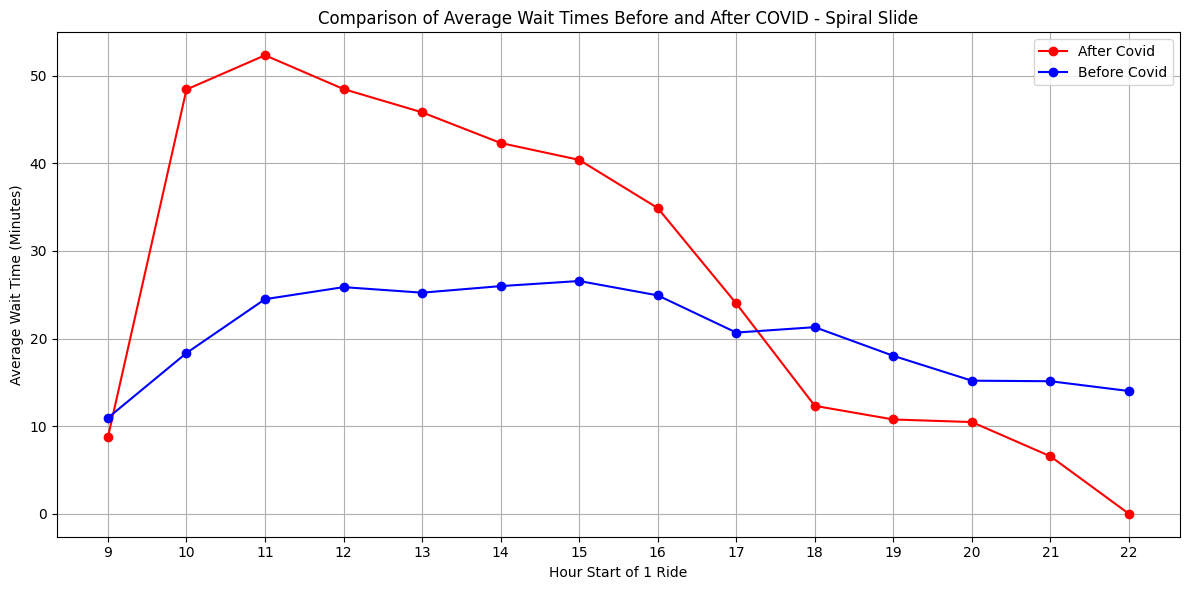

In [44]:

# Group by attraction and hour, then compute the mean wait time
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()

# Select the first 40 unique attractions
selected_attractions = ['Spiral Slide']

# Filter data for selected attractions
filtered_data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
filtered_data_no = df_15_bis[~df_15_bis['ATTRACTION'].isin(selected_attractions)]
# Compute the overall mean wait time across all selected attractions for each time interval
average_wait_time_overall = filtered_data.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
average_wait_time_remaining = filtered_data_no.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_wait_time_overall['HOUR START OF 1 RIDE'],
         average_wait_time_overall['WAIT TIME'],
         marker='o', linestyle='-', color='red', label='After Covid')


plt.plot(average_wait_time_remaining['HOUR START OF 1 RIDE'],
         average_wait_time_remaining['WAIT TIME'],
         marker='o', linestyle='-', color='blue', label='Before Covid')

# Labels and title
#plt.title('Overall Average Wait Time (Excluding Selected Attractions) After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title('Comparison of Average Wait Times Before and After COVID - Spiral Slide')
plt.legend()
plt.xticks(average_wait_time_remaining['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()

Bumper Cars

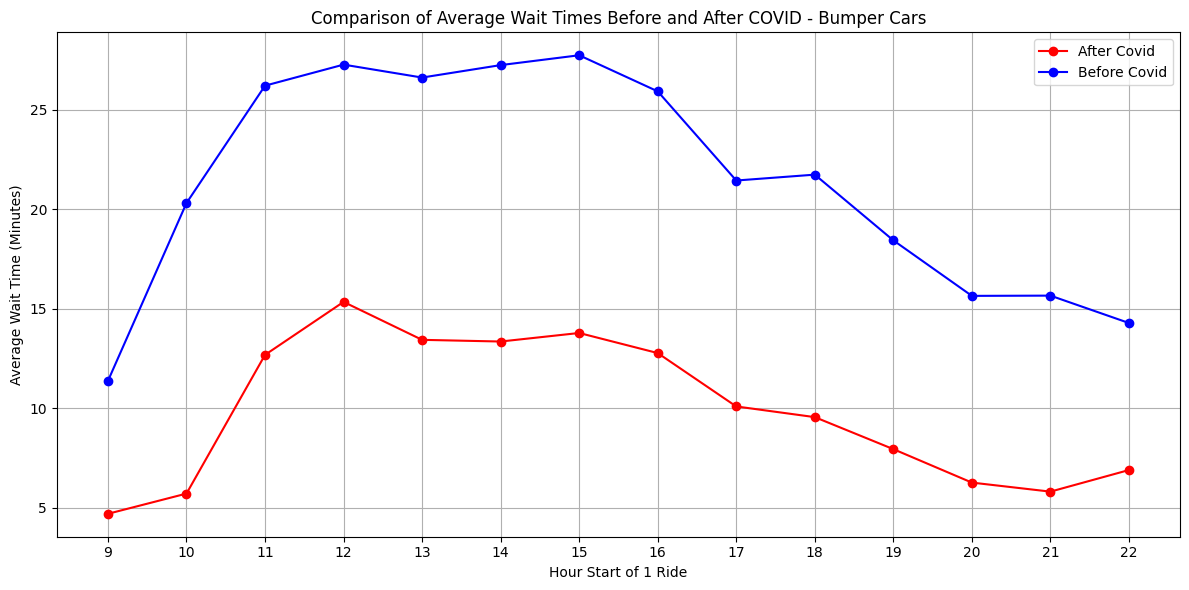

In [45]:

# Group by attraction and hour, then compute the mean wait time
average_wait_time_by_attraction_and_time = df_15_bis.groupby(['ATTRACTION', 'HOUR START OF 1 RIDE'])['WAIT TIME'].mean().reset_index()

# Select the first 40 unique attractions
selected_attractions = ['Bumper Cars']

# Filter data for selected attractions
filtered_data = average_wait_time_by_attraction_and_time[average_wait_time_by_attraction_and_time['ATTRACTION'].isin(selected_attractions)]
filtered_data_no = df_15_bis[~df_15_bis['ATTRACTION'].isin(selected_attractions)]
# Compute the overall mean wait time across all selected attractions for each time interval
average_wait_time_overall = filtered_data.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
average_wait_time_remaining = filtered_data_no.groupby('HOUR START OF 1 RIDE')['WAIT TIME'].mean().reset_index()
# Plot
plt.figure(figsize=(12, 6))
plt.plot(average_wait_time_overall['HOUR START OF 1 RIDE'],
         average_wait_time_overall['WAIT TIME'],
         marker='o', linestyle='-', color='red', label='After Covid')


plt.plot(average_wait_time_remaining['HOUR START OF 1 RIDE'],
         average_wait_time_remaining['WAIT TIME'],
         marker='o', linestyle='-', color='blue', label='Before Covid')

# Labels and title
#plt.title('Overall Average Wait Time (Excluding Selected Attractions) After COVID')
plt.xlabel('Hour Start of 1 Ride')
plt.ylabel('Average Wait Time (Minutes)')
#plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.title('Comparison of Average Wait Times Before and After COVID - Bumper Cars')
plt.legend()
plt.xticks(average_wait_time_remaining['HOUR START OF 1 RIDE'].unique())
plt.tight_layout()
plt.show()